#                       Esercitazione 4 - 12 Marzo 2023

Esplorate le caratteristiche dell'insieme dei numeri di macchina F($\beta$,t,L,U) sul vostro calcolatore utilizzando il comando sys.float_info, dopo aver importato im modulo sys:

import sys

print(sys.float_info)

In [1]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


min_exp=-1021   (L=-1021-1=-1022)

max_exp=1024    (U=1024-1=1023)

mant_dig=53 (incluso l'hidden bit)

dig=15, significa che i numeri "float" vengono convertiti in stringhe con un massimo di 15 cifre decimali. Le cifre decimali oltre la quindicesima vengono eliminate (troncate). (solo a livello di stringa visualizzata)

- **1.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [2]:
#Risoluzione 1
import numpy as np
x = 2.0**52
spacing = np.spacing(x)
print("Spacing 2^53:",np.spacing(2.0**53))
print("x + 0.5:",x + 0.5)
y = x + spacing
print("y:",y)
print("y + 0.5:",y + 0.5)

Spacing 2^53: 2.0
x + 0.5: 4503599627370496.0
y: 4503599627370497.0
y + 0.5: 4503599627370498.0


- **2** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [3]:
#Risoluzione 2
#Base
b = 2
#Mantissa
t = 53
#Esponente massimo
U = 1024
#Esponente minimo
L = -1021

card = 2 * (b - 1)*b**(t - 1)*(U-L+1)+1
print("Cardinalità:",card)

Cardinalità: 18428729675200069633


- **3**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$. 


In [4]:
#Risoluzione 3
eps = 2.0**-52
print("1 + eps:", 1 + eps)
print("1 + (x < eps):",1 + (eps / 2))

1 + eps: 1.0000000000000002
1 + (x < eps): 1.0


- **4** Costruire un numpy array costituito da n=10 valori tutti uguali a 0.1
-     Effettuate la somma utilizzando un ciclo for.
-     Effettuate la somma effettuando la somma con la funzione sum del modulo numpy.
  Cosa osservate? Cercate di giustificare i risultati 

In [5]:
#Risoluzione 4
arr = np.full(10,0.1)
somma = 0
for n in arr:
    somma += n
print("Somma for:",somma)
print("Somma np:",arr.sum())

Somma for: 0.9999999999999999
Somma np: 1.0


- **5.** Siano $a=1.234567890123400 e+15$, $b=-1.234567890123401 e+15$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [6]:
#Risoluzione 5
a = 1.234567890123400e+15
b=-1.234567890123401e+15
c=0.06

ris = (a+b)+c
ris2 = (a+c)+b
ris3 = a+(b+c)

print("Ris1:",ris)
print("Ris2:",ris2)
print("Ris3:",ris3)
print("Nei casi in cui si presenta una sottrazione il risultato non viene corretto.")

Ris1: -0.94
Ris2: -1.0
Ris3: -1.0
Nei casi in cui si presenta una sottrazione il risultato non viene corretto.


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [7]:
#Risoluzione 6
y1 = lambda x: np.sqrt(x**2.0 + 1.0) - x
y2 = lambda x: 1.0/(np.sqrt(x**2.0 + 1) + x)
x1 = 7777
x2 = 77777777
print("y1(x1):",y1(x1))
print("y1(x2):",y1(x2))
print("y2(x1):",y2(x1))
print("y2(x2):",y2(x2))
print("Nella seconda funzione non sono presenti differenze, quelle che causano problemi, quindi il risultato viene senza errori eccessivi.")

y1(x1): 6.429214317904552e-05
y1(x2): 0.0
y2(x1): 6.429214323431402e-05
y2(x2): 6.428571492857143e-09
Nella seconda funzione non sono presenti differenze, quelle che causano problemi, quindi il risultato viene senza errori eccessivi.


- **7.** Valutare in aritmetica floating point l'espressione
$$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}.
$$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

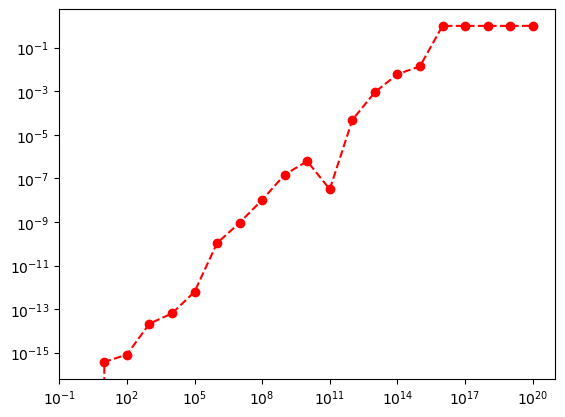

In [8]:
#Risoluzione 7
import matplotlib.pyplot as pl
A = lambda x: (1.0 / x) - (1.0/(x + 1.0))
B = lambda x: (1.0 / ( x * (x + 1.0)))
x = 10.0**np.arange(0,21)
erel = lambda x: np.abs(A(x) - B(x)) / np.abs(B(x))
pl.loglog(x,erel(x),"r--o")

- **8-**  Risolvere l'equazione $x^2+10^k x+1=0$ con k in range(1,9). 

- Scrivere un codice Python che calcola le due radici: x1=(-b+sqrt(Delta))/2  e x2=(-b-sqrt(Delta))/2, dove Delta=b^2-4ac,  per tutti i valori di k in range(1,9)

- Calcolare l'errore relativo della soluzione numerica x1 rispetto alla soluzione in aritmetica reale, che per valori di k alti è  uguale a $10^{-k}$, altrimenti è una sua approssimazione. 

- Visualizzare l'errore relativo per ogni valore di k.

- Proporre un algoritmo aleternativo per il calcolo di una delle due soluzioni, che fornisca errore relativo inferiore.

[1.02051443e-02 1.00020005e-04 1.00002262e-06 1.11176632e-08
 3.38535756e-07 7.61449337e-06 3.48484516e-03 2.54941940e-01
 1.00000000e+00]
[1.02051443e-02 1.00020005e-04 1.00000200e-06 1.00000001e-08
 1.00000032e-10 1.00013415e-12 1.00585162e-14 0.00000000e+00
 0.00000000e+00]


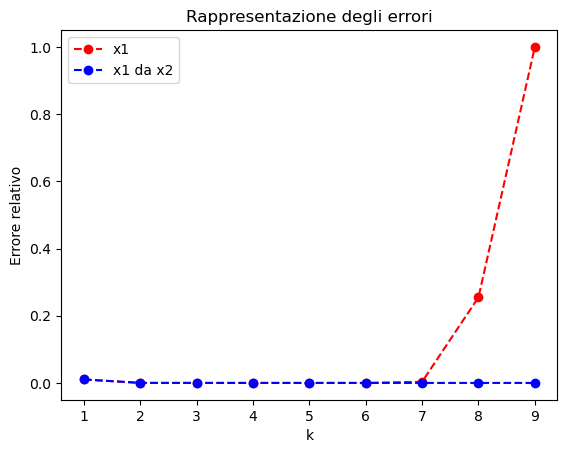

In [9]:
#Risoluzione 8
a=1.0
c=1.0
k=np.arange(1.0,10.0)
b=10.0**k;

Delta= (b**2.0)-(4.0*a*c)

x1=(-b+np.sqrt(Delta))/(2.0*a)
x2=(-b-np.sqrt(Delta))/(2.0*a)
x1alt = c / (a * x2)

areale=-10.0**(-k) 
err=np.abs(areale-x1)/np.abs(areale)
erralt = np.abs(areale - x1alt)/np.abs(areale)
print(err)
print(erralt)

pl.title("Rappresentazione degli errori")
pl.xlabel("k")
pl.ylabel("Errore relativo")
pl.plot(k,err,"r--o",k,erralt,"b--o")
pl.legend(["x1","x1 da x2"])

- **9.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. 

Visualizzare  un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.

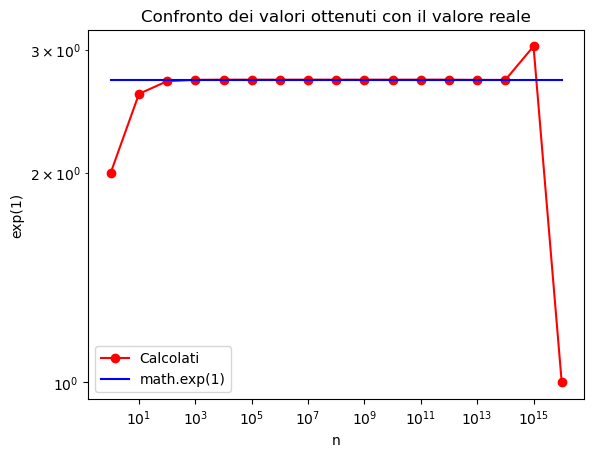

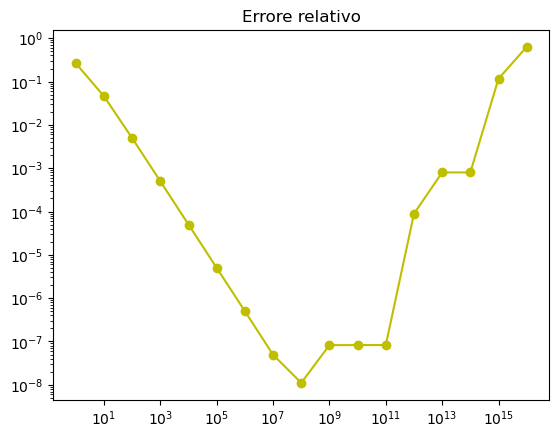

In [35]:
import math as m
n = 10.0**np.arange(0,17)
fn = (1/n + 1)**n
erel = np.abs(fn - corretto) / np.abs(corretto)
pl.title("Confronto dei valori ottenuti con il valore reale")
pl.loglog(n,fn,"r-o",n,np.full(17,m.exp(1)),"b-")
pl.legend(["Calcolati","math.exp(1)"])
pl.xlabel("n")
pl.ylabel("exp(1)")
pl.show()

pl.title("Errore relativo")
pl.loglog(n,erel,"y-o")
pl.xlabel(""
pl.show()